[JOEPY](http://jpktd.blogspot.com/2009/03/using-gaussian-kernel-density.html)

In [1]:
%matplotlib inline

In [2]:
import scipy.stats as stats
import numpy as np; np.random.seed(8765678)
import matplotlib.pyplot as plt

In [3]:
n = 1000 # number of samples
x = np.random.normal(size=(n,))

In [4]:
kde = stats.gaussian_kde(x)

In [5]:
x_ = np.linspace(-7,7,101)
pdf = kde(x_)

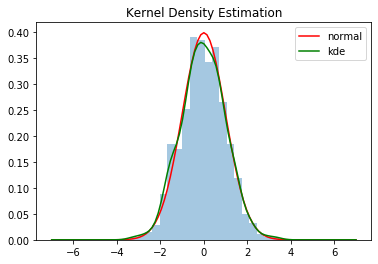

In [6]:
plt.figure()
plt.hist(x, bins=20, density=True, alpha=0.4)
plt.plot(x_, stats.norm.pdf(x_), label='normal', color="r")
plt.plot(x_, pdf, label='kde', color="g")
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()

In [7]:
alpha = 0.6 # weight for (prob of) lower distribution
mlow, mhigh = (-3,3)  # mean locations for gaussian mixture
x = np.concatenate([mlow + np.random.normal(size=int(alpha * n)),
                     mhigh + np.random.normal(size=int((1-alpha) * n))])
print((mlow + np.random.normal(size=int(alpha * n))).shape)
print((mhigh + np.random.normal(size=int((1-alpha) * n))).shape)
print(x.shape)

kde = stats.gaussian_kde(x)

x_ = np.linspace(-7,7,101)
pdf = kde(x_)

(600,)
(400,)
(1000,)


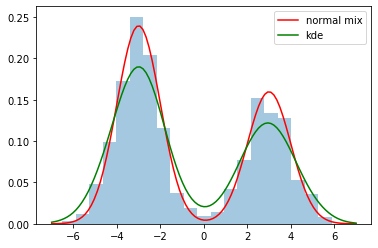

In [8]:
plt.hist(x, bins=20, density=True, alpha=0.4)
plt.plot(x_, alpha * stats.norm.pdf(x_, loc=mlow) +
         (1-alpha) * stats.norm.pdf(x_, loc=mhigh),
         color="r", label='normal mix')
plt.plot(x_, pdf, label='kde', color="g")
plt.legend()
plt.show()